## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseandstudy_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouseandstudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking for missing values. There do not seem to be any in this data set
mouseandstudy_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Checking the number of mice.
num_mice = len(mouseandstudy_df["Mouse ID"].unique())
num_mice


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Note to self: check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
duplicate_mice = mouseandstudy_df.loc[mouseandstudy_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_mice)


['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all_data = mouseandstudy_df.loc[mouseandstudy_df["Mouse ID"]=='g989']
duplicate_mice_all_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = mouseandstudy_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
no_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_nodups = len(no_duplicates["Mouse ID"].unique())
num_of_mice_nodups


249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats = no_duplicates.groupby("Drug Regimen")
data_mean = summary_stats["Tumor Volume (mm3)"].mean()
data_median = summary_stats["Tumor Volume (mm3)"].median()
data_variance = data_variance = summary_stats["Tumor Volume (mm3)"].var()
data_std = summary_stats["Tumor Volume (mm3)"].std()
data_sem = summary_stats["Tumor Volume (mm3)"].sem()

summary_stats_all = pd.DataFrame({
                                    
                                    "Mean":data_mean,
                                    "Median":data_median,
                                    "Variance":data_variance,
                                    "Standard Deviation":data_std,
                                    "SEM":data_sem
                                 
                                 })
summary_stats_all

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# How to use .agg code Source: Pandas.core.groupby.DataFrameGroupBy.agg. (n.d.). Retrieved July 13, 2020, from https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
summary_data_grouped = no_duplicates.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_data_grouped = summary_data_grouped.rename(columns={"mean":"Mean","median":"Median","var":"Variance","std":"Standard Deviation","sem":"SEM"})
summary_data_grouped

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

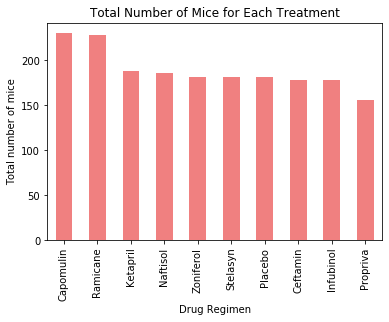

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_num = no_duplicates["Drug Regimen"].value_counts()
mice_num.plot(kind='bar', title='Total Number of Mice for Each Treatment', color='lightcoral')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of mice')
plt.show()



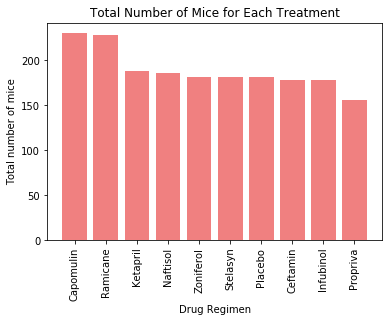

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values = mice_num.index.values
y_values = mice_num.values
plt.bar(x_values, y_values, color='lightcoral')
plt.title('Total Number of Mice for Each Treatment',loc='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of mice')
plt.xticks(rotation = 90)
plt.show()


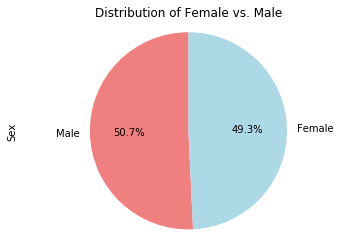

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = no_duplicates["Sex"].value_counts()
mice_gender.plot(kind='pie', autopct="%1.1f%%", title='Distribution of Female vs. Male',startangle=90, colors=['lightcoral','lightblue'])
plt.axis("equal")
plt.show()


In [14]:
# Just showing the total number of mice for each gender
mice_gender

Male      958
Female    930
Name: Sex, dtype: int64

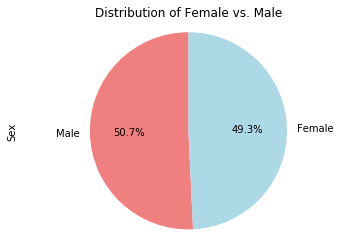

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels_values = mice_gender.index.values
y_values_gender = mice_gender.values
plt.pie(y_values_gender, labels = labels_values, autopct="%1.1f%%",startangle=90, colors=['lightcoral','lightblue'])
plt.title('Distribution of Female vs. Male',loc='center')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = no_duplicates.groupby("Mouse ID")
greatest_tumor = greatest_tumor["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()
greatest_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = greatest_tumor.merge(no_duplicates, on=["Mouse ID","Timepoint"], how="left")
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merge_data.loc[merge_data["Drug Regimen"]== i,  "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Find lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    
    # Finding outlier and printing out drug regimen name and outlier number, if meets condition
    find_outlier = tumor_vol.loc[(tumor_vol < lower_bound)| (tumor_vol>upper_bound)]
    
    
    print(f"{i} outlier is: {find_outlier}")
          
    
# Try and pretty this up, if possible

Capomulin outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlier is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)


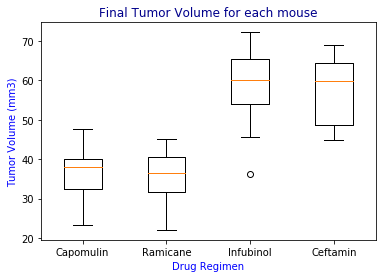

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels = treatment_list)
plt.title('Final Tumor Volume for each mouse',loc='center', color='darkblue')
plt.xlabel('Drug Regimen',color='blue')
plt.ylabel('Tumor Volume (mm3)', color='blue')
plt.show()

## Line and Scatter Plots

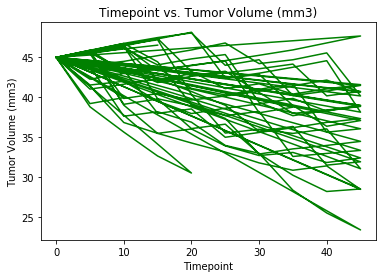

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_regimen_line = no_duplicates.loc[no_duplicates["Drug Regimen"]=="Capomulin"]

# Set x and y values
timepoint = capomulin_regimen_line["Timepoint"].values
tumor_volume = capomulin_regimen_line["Tumor Volume (mm3)"].values

plt.plot(timepoint, tumor_volume, color='green')
plt.title('Timepoint vs. Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#messed up and did all and not a single mouse treated with capomulin
#do i just pick a random mouse with Capomulin treatment? misread this 
# could use maybe import random functionality here?

## Correlation and Regression

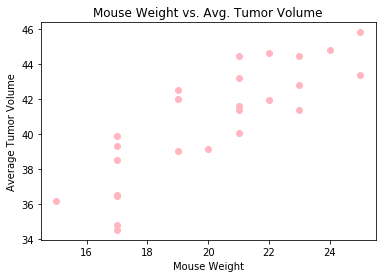

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create dataframe where Capomulin is the only drug 
capomulin_regimen_scatter = no_duplicates.loc[no_duplicates["Drug Regimen"]=="Capomulin"]

capomulin_regimen_average = capomulin_regimen_scatter.groupby(['Mouse ID']).mean()

# Set x and y values
weight_data = capomulin_regimen_average["Weight (g)"].values
volume_data = capomulin_regimen_average["Tumor Volume (mm3)"].values

# Creae scatter plot and labels
plt.scatter(weight_data, volume_data, color='lightpink')
plt.title("Mouse Weight vs. Avg. Tumor Volume", loc='center')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
